In [1]:
import functools
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import palettable
import pandas as pd
from scipy.spatial import ConvexHull
import sys
import pneumodel.plotting as plotting
import pneumodel.trial as pn
import scipy.stats as st

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%load_ext autoreload
%autoreload 2

##  Setup

In [3]:
%matplotlib inline
cubehelix = palettable.cubehelix.cubehelix1_16_r.mpl_colors
COLORS  = {'infant': cubehelix[6], 'toddler': cubehelix[10]}
MARKERS = {'infant': 'o', 'toddler': 's'}

In [4]:
OUTPUTS_PATH = "/Volumes/Samsung USB/WCV-PAPER"
HI_TRANS_FOLDER = "wcv-trial-kenya"
LO_TRANS_FOLDER = "wcv-trial-kenya-beta-0.1"
FIGURES_PATH = os.path.join(OUTPUTS_PATH, 'figures', 'multisetting', '{}+{}'.format(HI_TRANS_FOLDER, LO_TRANS_FOLDER))
save_figure = functools.partial(plotting.save_figure, folder=FIGURES_PATH, dpi=300)

## Analysis

In [5]:
%%time
trj_hi = pn.load_trajectories(os.path.join(OUTPUTS_PATH, HI_TRANS_FOLDER), index_by='birth')
trj_lo = pn.load_trajectories(os.path.join(OUTPUTS_PATH, LO_TRANS_FOLDER), index_by='birth')

CPU times: user 4.92 s, sys: 295 ms, total: 5.21 s
Wall time: 1min 45s


### Sample runs

['/Volumes/Samsung USB/WCV-PAPER/figures/multisetting/wcv-trial-kenya+wcv-trial-kenya-beta-0.1/example-using-run-0-0.pdf',
 '/Volumes/Samsung USB/WCV-PAPER/figures/multisetting/wcv-trial-kenya+wcv-trial-kenya-beta-0.1/example-using-run-0-0.png']

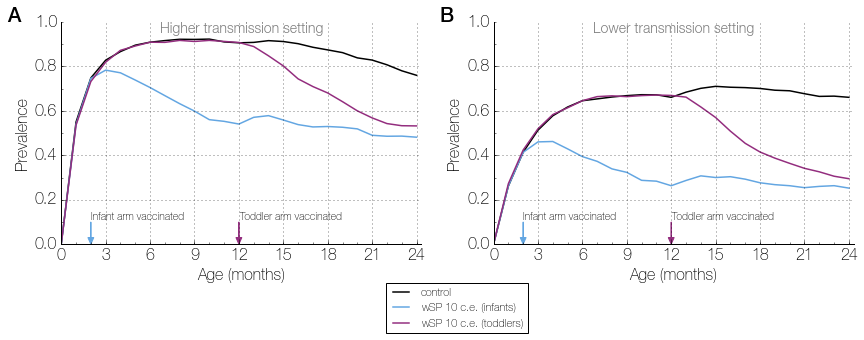

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

run = 'run-0'
num_months = 25
marker='o'
markersize=0

for ax, trj in zip(axes, [trj_hi, trj_lo]):
  ax.plot(trj['control-infant'][run][:num_months],  c='k', label='control', 
          marker=marker, markersize=markersize, lw=1.5)
  ax.plot(trj['dr-10ce-infant'][run][:num_months],  c=COLORS['infant'], label='wSP 10 c.e. (infants)', 
          marker=marker, markersize=markersize, lw=1.5)
  ax.plot(trj['dr-10ce-toddler'][run][:num_months], c=COLORS['toddler'], label='wSP 10 c.e. (toddlers)', 
          marker=marker, markersize=markersize, lw=1.5)

  # mark when vaccination occurs
  ax.arrow(60, 0.1, 0.0, -0.1, fc=COLORS['infant'], ec=COLORS['infant'], 
           head_width=12, head_length=0.03, length_includes_head=True)
  ax.text(60, 0.1, 'Infant arm vaccinated', fontsize=10.5, ha='left', va='bottom')
  
  ax.arrow(360, 0.1, 0.0, -0.1, fc=COLORS['toddler'], ec=COLORS['toddler'], 
           head_width=12, head_length=0.03, length_includes_head=True)
  ax.text(360, 0.1, 'Toddler arm vaccinated', fontsize=10.5, ha='left', va='bottom')

  ax.set_ylabel('Prevalence')
  ax.set_ylim(0, 1.0)
  ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
  ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

  ax.set_xlabel('Age (months)')
  ax.set_xlim(0, 24 * 30 + 10)
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(90))
  ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
  ax.set_xticklabels('{:.0f}'.format(x / 30) for x in ax.get_xticks())

  ax.grid(True)

  plotting.remove_spines(ax)

  
# Labeling

# Panel text
for ax, txt in zip(axes, ('Higher transmission setting', 'Lower transmission setting')):
  ax.text(0.5, 1.0, txt, ha='center', va='top', transform=ax.transAxes, 
          fontweight='light', fontsize=14, color='.5')

# Legend
lgd = axes[0].legend(bbox_to_anchor=(1.31, -0.15), fontsize=11, frameon=True)

# Panel labels
panel_labels = []
for label, ax in zip('AB', axes.flatten()):
  t = ax.text(-0.15, 1.00, label, fontsize=20, 
              fontweight='medium', transform=ax.transAxes)
  panel_labels.append(t)
  
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

save_figure(fig, 'example-using-{}'.format(run), bbox_inches='tight', bbox_extra_artist=panel_labels)

### SFig Prev vs Age, Duration vs Age

Load prevalence trajectories

In [7]:
trj_hi['control-infant'].head()

,run-0,run-1,run-2,run-3,run-4,run-5,run-6,run-7,run-8,run-9,...,run-40,run-41,run-42,run-43,run-44,run-45,run-46,run-47,run-48,run-49
dsb,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.550260,0.546894,0.556090,0.536952,0.552194,0.530768,0.546966,0.533667,0.527422,0.511026,...,0.541942,0.522941,0.511633,0.517124,0.524038,0.510813,0.539324,0.507803,0.555088,0.547385
60,0.748496,0.741469,0.759735,0.734751,0.748695,0.722311,0.734804,0.719245,0.728549,0.715089,...,0.747641,0.716811,0.723695,0.708868,0.719414,0.716349,0.733667,0.711222,0.740012,0.755368
90,0.828342,0.818822,0.845659,0.816904,0.829685,0.818950,0.817105,0.806873,0.815900,0.806679,...,0.832864,0.817743,0.818456,0.808968,0.809763,0.810930,0.817653,0.808365,0.831323,0.842274
120,0.867069,0.864021,0.884283,0.859586,0.873214,0.856164,0.861055,0.858062,0.856999,0.859274,...,0.877975,0.858928,0.857488,0.856050,0.855160,0.851218,0.865729,0.854125,0.868357,0.882471


Load trial logs

In [8]:
%%time
TRIALS_HI = pn.load_trials(os.path.join(OUTPUTS_PATH, HI_TRANS_FOLDER))

CPU times: user 1min 39s, sys: 28.6 s, total: 2min 8s
Wall time: 6min 18s


In [9]:
%%time
TRIALS_LO = pn.load_trials(os.path.join(OUTPUTS_PATH, LO_TRANS_FOLDER))

CPU times: user 44.7 s, sys: 13.8 s, total: 58.6 s
Wall time: 3min 2s


Calculate mean durations

In [10]:
%%time
L_dur = 6 * 30 # interval length (in days)
m_dur = 1      
n_dur = 10
dsb_dur = np.array([i * L_dur for i in range(m_dur, n_dur)])
arm_name = 'control-infant'

mean_durations_lo = {d: [pn.get_mean_duration(t.arms[arm_name], L_dur, first_day=d) for t in TRIALS_LO] for d in dsb_dur}
mean_durations_hi = {d: [pn.get_mean_duration(t.arms[arm_name], L_dur, first_day=d) for t in TRIALS_HI] for d in dsb_dur}

CPU times: user 14.4 s, sys: 2.96 s, total: 17.4 s
Wall time: 23.9 s


Plot!

30 0.535928824562
60 0.734777808546
90 0.818885773157
120 0.865533403734
150 0.888631202403
180 0.902360103859
210 0.909330054252
240 0.909625752624
270 0.908419206368
300 0.905907535376
330 0.899939239035
360 0.893517121842
30 0.256810747228
60 0.41079693608
90 0.505826843901
120 0.562172190256
150 0.606725834772
180 0.633949641808
210 0.652125494803
240 0.661736261448
270 0.668557157191
300 0.675815662074
330 0.677195511053
360 0.67586726068
6, 40.35, 38.75, 42.11
12, 36.41, 34.43, 38.34
18, 31.56, 29.81, 32.95
24, 27.31, 25.89, 28.45
30, 24.10, 23.03, 25.30
36, 21.88, 21.00, 22.60
42, 20.35, 19.87, 21.00
48, 19.33, 18.94, 19.70
54, 18.67, 18.35, 18.94
6, 45.09, 43.25, 47.48
12, 43.34, 42.22, 44.53
18, 41.18, 39.88, 42.78
24, 38.77, 37.44, 40.22
30, 36.31, 34.98, 37.66
36, 34.12, 33.00, 35.45
42, 31.91, 30.31, 33.43
48, 29.99, 28.92, 31.24
54, 28.26, 27.19, 29.13


['/Volumes/Samsung USB/WCV-PAPER/figures/multisetting/wcv-trial-kenya+wcv-trial-kenya-beta-0.1/prev+dur-vs-age-control-infant-0.pdf',
 '/Volumes/Samsung USB/WCV-PAPER/figures/multisetting/wcv-trial-kenya+wcv-trial-kenya-beta-0.1/prev+dur-vs-age-control-infant-0.png']

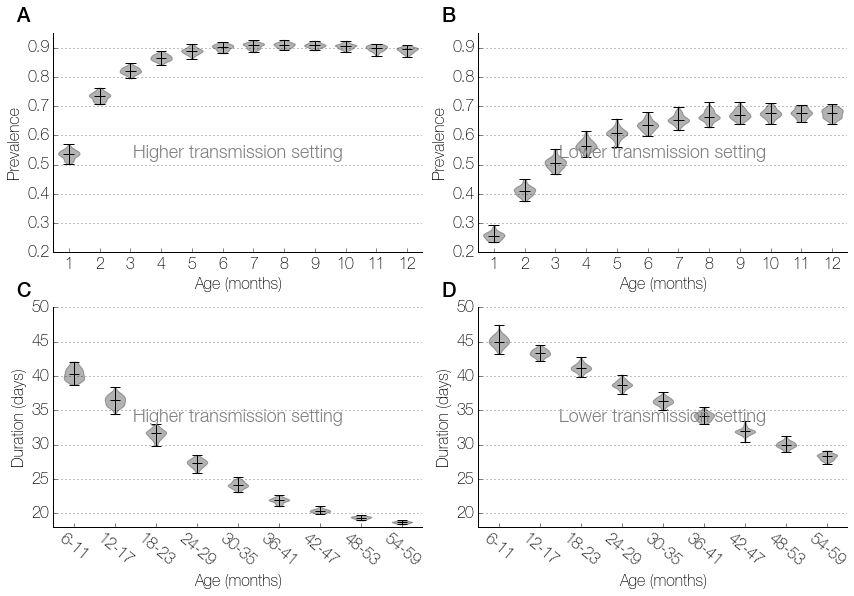

In [11]:
fig, all_axes = plt.subplots(2, 2, figsize=(12, 8))
arm_name = 'control-infant'

trjs   = [trj_hi,              trj_lo]
durs   = [mean_durations_hi,   mean_durations_lo]
labels = ['Higher transmission setting', 'Lower transmission setting']

# Prev vs age
m_prev, n_prev = 1, 13
dsb_prev = np.array([30 * k for k in range(m_prev, n_prev)]) # days since birth

axes = all_axes[0]
for label, trj, ax in zip(labels, trjs, axes):
  for d in dsb_prev:
    ys = trj[arm_name].loc[d]
    print d, np.median(ys)
    violin_parts = ax.violinplot(ys, [d / 30], points=100, vert=True, widths=0.7, 
                                 showmeans=False, showextrema=True, showmedians=True)
    plotting.style_violin(violin_parts, 'k', 'k')

  ax.text(0.5, 0.45, label, fontsize=18, fontweight='light', color='.5', transform=ax.transAxes, ha='center', va='center')    
    
  ax.set_xlabel('Age (months)')
  ax.set_xlim(m_prev - 0.5, n_prev - 0.5)
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

  ax.set_ylabel('Prevalence')
  ax.set_ylim(0.2, 0.95)
  ax.yaxis.grid(True)

  
# Duration vs age
axes = all_axes[1]
for label, dur, ax in zip(labels, durs, axes):
  for d in sorted(dur.iterkeys()):
    ys = dur[d]
    print '{:.0f}, {:.2f}, {:.2f}, {:.2f}'.format(d / 30, np.mean(ys), np.min(ys), np.max(ys))
    v = ax.violinplot(ys, [d / L_dur], points=80, widths=0.5,
                      showmeans=False, showextrema=True, showmedians=True)
    plotting.style_violin(v, 'k', 'k')

  ax.text(0.5, 0.5, label, fontsize=18, fontweight='light', color='.5', transform=ax.transAxes, ha='center', va='center')    
    
  ax.set_xlabel('Age (months)')
  ax.set_xticks(dsb_dur / L_dur)
  ax.set_xlim(m_dur - 0.5, n_dur - 0.5)
  ax.set_xticklabels(['{:.0f}-{:.0f}'.format(d / 30, d / 30 + (L_dur / 30 - 1)) for d in dsb_dur], rotation=-40)

  ax.set_ylabel('Duration (days)')
  ax.yaxis.grid(True)
  ax.set_ylim(18, 50)

for ax in all_axes.flatten():
  plotting.remove_spines(ax)
  
panel_labels = []
for label, ax in zip('ABCD', all_axes.flatten()):
  t = ax.text(-0.1, 1.05, label, fontsize=20, 
              fontweight='medium', transform=ax.transAxes)
  panel_labels.append(t)

#plt.subplots_adjust(hspace=0.25, wspace=0.35)
fig.tight_layout()

save_figure(fig, 'prev+dur-vs-age-{}'.format(arm_name), bbox_inches='tight', bbox_extra_artist=[panel_labels])